<a href="https://colab.research.google.com/github/shivpandey2406/Machine-Learning-Project/blob/main/Salary_prediction_by_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 ! git clone https://github.com/shivpandey2406/python_AIML.git

Cloning into 'python_AIML'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 101 (delta 11), reused 0 (delta 0), pack-reused 55
Receiving objects: 100% (101/101), 8.81 MiB | 12.85 MiB/s, done.
Resolving deltas: 100% (25/25), done.


## Importing Libraries

In [2]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array

## Load dataset and Summary of dataset

In [6]:
dataset = pd.read_csv('/content/python_AIML/salary.csv')
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


## Mapping salary data into binary values

In [7]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


## Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)

In [12]:
X = dataset.iloc[:, :-1].values
X

Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

## Splitting Dataset into Train & Test

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Feature Scaling*         
 we scale our data to make all the features contribute equally to the result
Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
Transform - Transform method is transforming all the features using the respective mean and variance,
We want our test data to be a completely new and a surprise set for our model

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.20264866, -2.76154633, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       ...,
       [-0.92200734, -0.81532491, -0.14509813,  0.85306386],
       [ 0.39674466,  1.52014079, -0.14509813, -0.03923011],
       [ 0.03042466, -0.42608063,  0.83219401, -0.03923011]])

## Finding the Best K-Value

Text(0, 0.5, 'Mean Error')

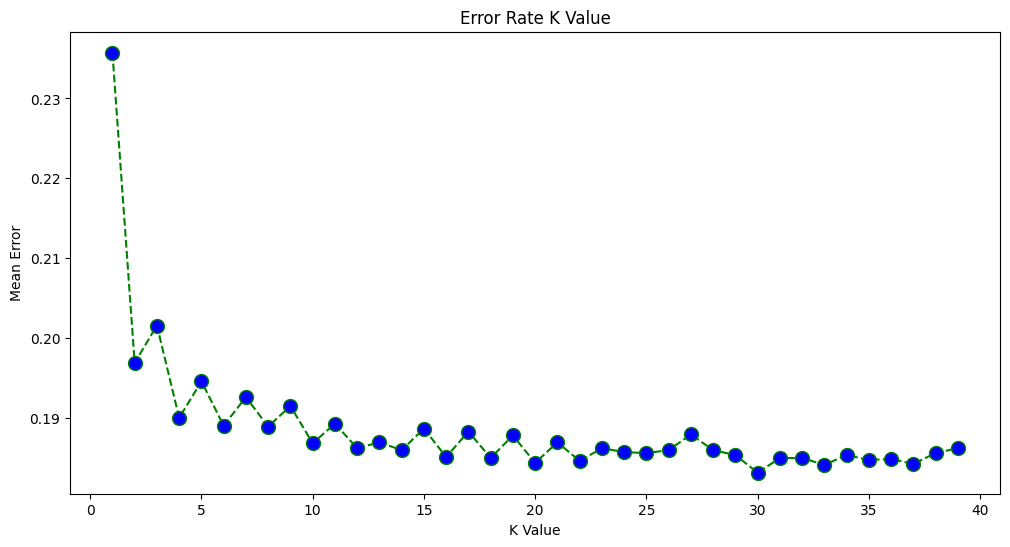

In [17]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


## Training the model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

## Predicting, wheather new customer with Age & Salary will Buy or Not

In [40]:

age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got  Salary above 50K")

Enter New Employee's Age: 68
Enter New Employee's Education: 9
Enter New Employee's Captital Gain: 0
Enter New Employee's Hour's Per week: 40
[0]
Customer might not got  Salary above 50K


## Prediction for all Test Data

In [36]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Evaluating Model - CONFUSION MATRIX

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5917  276]
 [1327  621]]
Accuracy of the Model: 80.30954428202924%
